## Evaluating and visualizing gene ontology (GO) terms associated bacterial peptides in Trocas 7 incubations

## All stations

#### Beginning with: stripped bacterial peptides and GO term abundances in spreadsheets

#### Goal: heatmaps of GO terms over stations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

## Plotting bacterial GO terms using matplotlib stacked bar plots

### For each incubation station
### Just cellular component GO terms

In [2]:
# rearranged and condensed the csv manually in Libre Calc
# read in new csv:

MN = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/MN_CC_GO_sorted.csv", index_col=0)
MS = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/MS_CC_GO_sorted.csv", index_col=0)
BY = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/BY_CC_GO_sorted.csv", index_col=0)
CV = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/CV_CC_GO_sorted.csv", index_col=0)

MN_T = MN.transpose()
MS_T = MS.transpose()
BY_T = BY.transpose()
CV_T = CV.transpose()

CV_T.head()

GO Cellular Component,integral component of membrane,cytoplasm,plasma membrane,nucleus,ribosome,mitochondrion,chloroplast
Time 0 small,45.744681,23.404255,18.439716,7.801418,2.127660,1.063830,1.41844
T24 small,43.750000,24.609375,17.968750,9.375000,2.734375,1.562500,0.00000
x,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
T0 large,48.888889,22.222222,17.777778,5.555556,2.222222,3.333333,0.00000
Time 24 large,49.710983,20.809249,17.341040,8.092486,1.734104,2.312139,0.00000


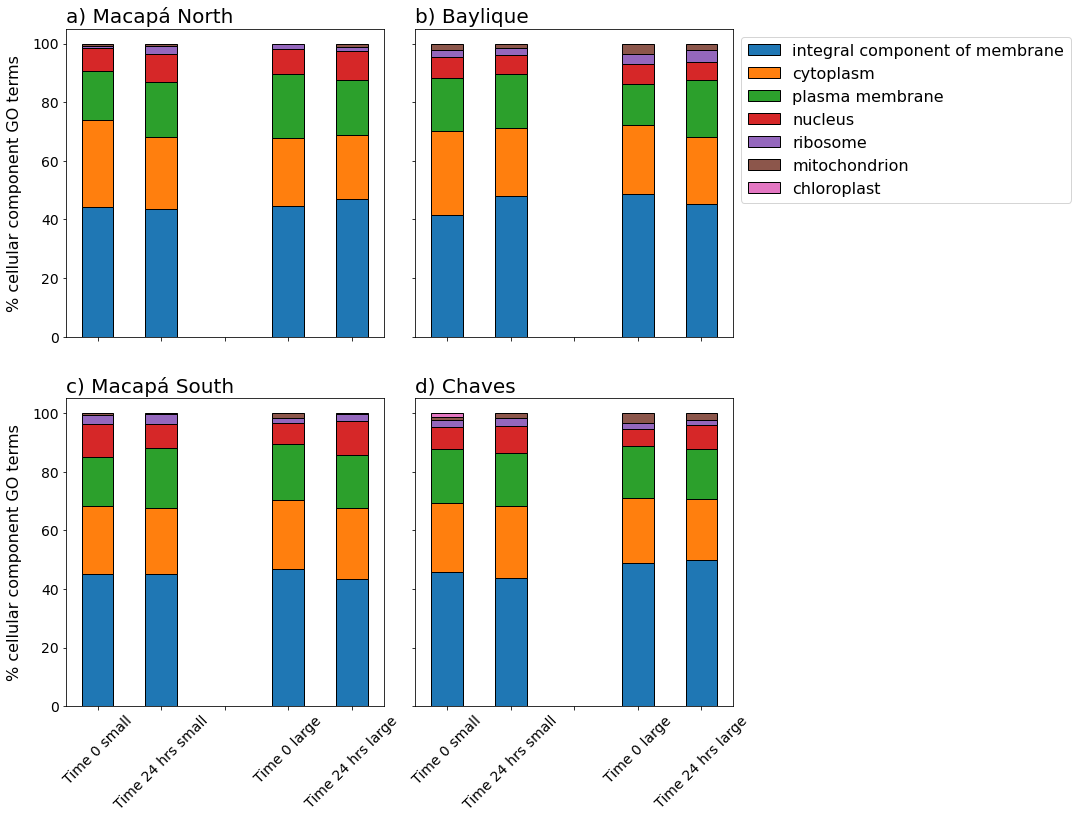

In [3]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 24 hrs small', '', 'Time 0 large', 'Time 24 hrs large']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapá North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)

#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapá South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)

#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1, facecolor = 'white');

## For context: cellular component GO terms from Christina's Baja sediment core

### All samples from core (12 in total, 99-1645 cm core depth)
### 1574 total unique peptides found, 973 of which matched to UniProt
### 899 have at least one GO term

In [4]:
TC = pd.read_csv("/home/millieginty/Documents/git-repos/2018-etnp/analyses/unipept/GO/plotting/allcore-CC-GO-sorted.csv", index_col=0)

TC_T = TC.transpose()

TC_T.head()

GO Cellular Component,integral component of membrane,cytoplasm,plasma membrane,nucleus,ribosome,mitochondrion,chloroplast
Core total,50.233645,20.872274,15.186916,8.64486,1.791277,1.869159,1.401869
Algal,37.500000,0.000000,12.500000,12.50000,0.000000,6.250000,31.250000


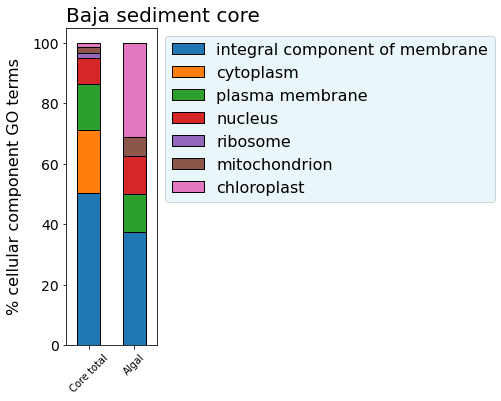

In [5]:
fig, ax = plt.subplots(figsize=(2, 5))

plt.tight_layout()

labels = ['Core total', 'Algal']

#  Core total
TC_T.plot(ax = ax, kind='bar', stacked=True, edgecolor = 'black')
ax.set_title('Baja sediment core', fontsize = 20, loc='left')
ax.set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
ax.set_xticklabels(labels, rotation = 45)
ax.get_legend().remove()
ax.tick_params(axis='y', labelsize= 14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1, facecolor = '#e5f5f9')

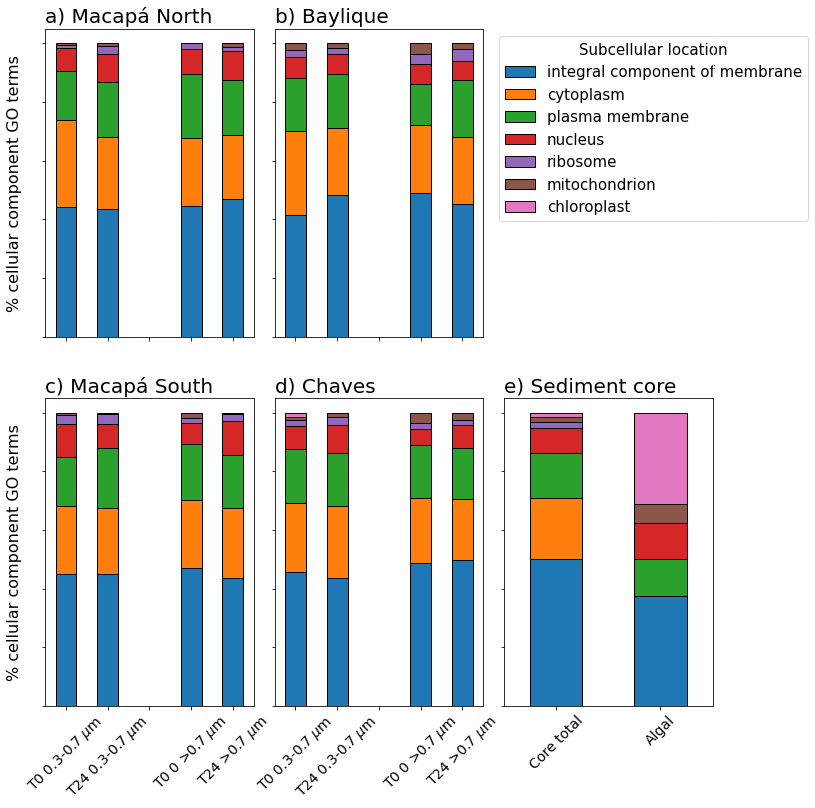

In [7]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=3, sharex = False, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 24 hrs small', '', 'Time 0 large', 'Time 24 hrs large']
labels2 = ['T0 0.3-0.7 $\mu$m', 'T24 0.3-0.7 $\mu$m', '', 'T0 0 >0.7 $\mu$m', 'T24 >0.7 $\mu$m']
labelcore = ['Core total', 'Algal']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapá North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[0,0].get_legend().remove()
axes[0,0].set_yticklabels(labels, rotation = 45, fontsize = 5, color = 'white')
axes[0,0].set_xticklabels(labels2, rotation = 45, fontsize = 5, color = 'white')

#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
axes[0,1].set_xticklabels(labels2, rotation = 45, fontsize = 5, color = 'white')

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapá South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_yticklabels(labels, rotation = 45, fontsize = 5, color = 'white')
axes[1,0].set_xticklabels(labels2, rotation = 45, fontsize = 14)


#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels2, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

# Baja sediment
TC_T.plot(ax = axes[1,2], kind='bar', stacked=True, edgecolor = 'black')
axes[1,2].set_title('e) Sediment core', fontsize = 20, loc='left')
axes[1,2].get_legend().remove()
axes[1,2].set_xticklabels(labelcore, rotation = 45, fontsize = 14)
axes[1,2].tick_params(axis='y', labelsize= 14)

# White out last 
axes[0,2].set_yticklabels('Bulk', color="white")
axes[0,2].spines['bottom'].set_color('white')
axes[0,2].spines['top'].set_color('white') 
axes[0,2].spines['right'].set_color('white')
axes[0,2].spines['left'].set_color('white')
axes[0,2].tick_params(axis='x', colors='white')
axes[0,2].tick_params(axis='y', colors='white')
axes[0,2].patch.set_facecolor('white')
axes[0,2].patch.set_edgecolor('none')
axes[0,2].patch.set_alpha(0.0)


handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1.04, 1), \
                 loc="upper left", title="Subcellular location", \
                 title_fontsize='15', fontsize = 15, ncol = 1, facecolor = 'white');

## Plotting cellular component GO terms from just primary producers' peptides

### Combined all stations, since there were only 40 peptides total at T0 and 24 at T24

In [17]:
PP = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/all-sta_PP_CC_GO_sorted.csv", index_col=0)

PP_T = PP.transpose()

PP_T.head()

GO Cellular Component,integral component of membrane,cytoplasm,plasma membrane,nucleus,ribosome,mitochondrion,chloroplast
Time 0 small,36.363636,0.0,9.090909,9.090909,9.090909,18.181818,18.181818
T24 small,40.000000,20.0,0.000000,20.000000,0.000000,0.000000,20.000000
x,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
T0 large,50.000000,0.0,0.000000,50.000000,0.000000,0.000000,0.000000
Time 24 large,80.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000


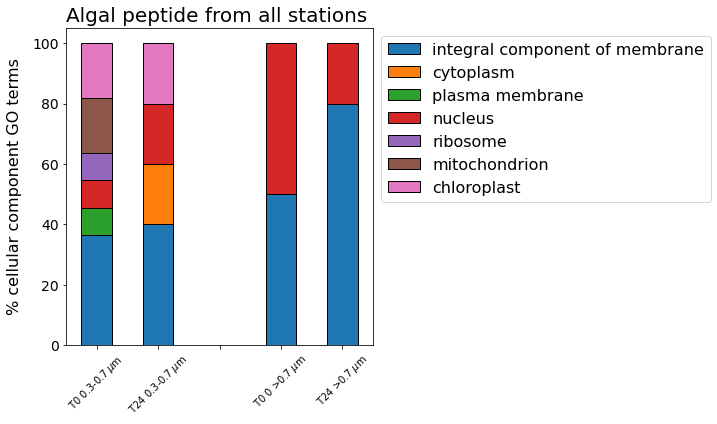

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.tight_layout()

labels2 = ['T0 0.3-0.7 $\mu$m', 'T24 0.3-0.7 $\mu$m', '', 'T0 0 >0.7 $\mu$m', 'T24 >0.7 $\mu$m']

#  Primary producers total
PP_T.plot(ax = ax, kind='bar', stacked=True, edgecolor = 'black')
ax.set_title('Algal peptide from all stations', fontsize = 20, loc='left')
ax.set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
ax.set_xticklabels(labels2, rotation = 45)
ax.get_legend().remove()
ax.tick_params(axis='y', labelsize= 14)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1)

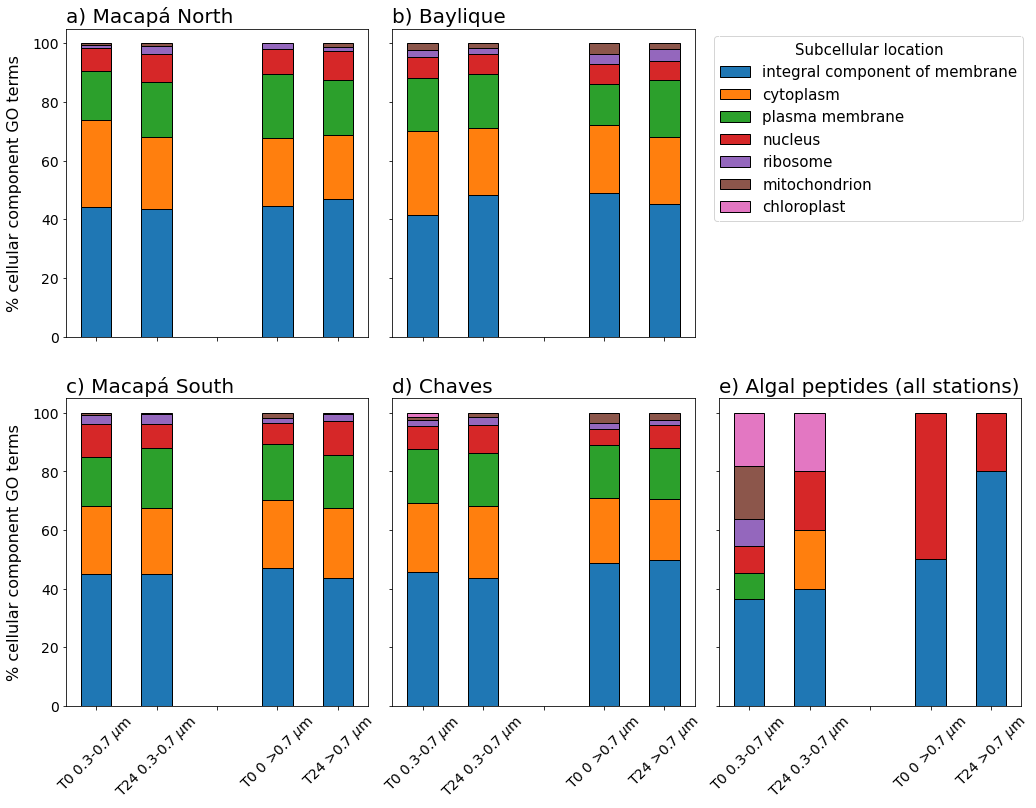

In [42]:
fig, axes = plt.subplots(figsize=(14, 10),nrows=2, ncols=3, sharex = False, sharey = False)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.08, hspace=0.2)

#labels = ['Time 0 small', 'Time 24 hrs small', '', 'Time 0 large', 'Time 24 hrs large']
labels2 = ['T0 0.3-0.7 $\mu$m', 'T24 0.3-0.7 $\mu$m', '', 'T0 0 >0.7 $\mu$m', 'T24 >0.7 $\mu$m']
labelcore = ['Core total', 'Algal']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapá North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)
axes[0,0].set_xticklabels(labels2, rotation = 45, fontsize = 5, color = 'white')

#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].set_xticklabels(labels2, rotation = 45, fontsize = 5, color = 'white')
axes[0,1].set(yticklabels=[])  # remove the tick labels

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapá South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].tick_params(axis='y', labelsize= 14)
axes[1,0].set_xticklabels(labels2, rotation = 45, fontsize = 14)


#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels2, rotation = 45, fontsize = 14)
axes[1,1].set(yticklabels=[])  # remove the tick labels
axes[1,1].tick_params(axis='y', labelsize= 14)

#  Primary producers total
PP_T.plot(ax = axes[1,2], kind='bar', stacked=True, edgecolor = 'black')
axes[1,2].set_title('e) Algal peptides (all stations)', fontsize = 20, loc='left')
#axes[1,2].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[1,2].set_xticklabels(labels2, rotation = 45, fontsize = 14)
axes[1,2].set(yticklabels=[])  # remove the tick labels
axes[1,2].get_legend().remove()
axes[1,2].tick_params(axis='y', labelsize= 14)

# White out last 
axes[0,2].set_yticklabels('Bulk', color="white")
axes[0,2].spines['bottom'].set_color('white')
axes[0,2].spines['top'].set_color('white') 
axes[0,2].spines['right'].set_color('white')
axes[0,2].spines['left'].set_color('white')
axes[0,2].tick_params(axis='x', colors='white')
axes[0,2].tick_params(axis='y', colors='white')
axes[0,2].patch.set_facecolor('white')
axes[0,2].patch.set_edgecolor('none')
axes[0,2].patch.set_alpha(0.0)


handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1.04, 1), \
                 loc="upper left", title="Subcellular location", \
                 title_fontsize='15', fontsize = 15, ncol = 1, facecolor = 'white');